In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [ ]:
df.head()

,id,edad,genero,ingreso,distancia,frecuencia,medio_trans,participado_antes,incentivos,desalentador,preocupacion_medio,dispuesto_carpooling,impacto_carpooling
0,0,15-25,M,$2000 - $5000,10 - 20km,Una vez al dia,Carro propio,Si,Ahorro en costos,Preferencia por la privacidad,Neutral,No,Tal vez
1,1,15-25,M,$2000 - $5000,5 - 10km,Una vez al dia,Transporte publico,Si,Ahorro en costos,Preocupaciones de seguridad,Preocupado,Si,Si
2,2,15-25,F,$1000 - $2000,10 - 20km,Varias veces a la semana,Carro propio,No,Ahorro en costos,Problemas de horarios,Preocupado,No,Tal vez
3,3,15-25,M,$2000 - $5000,< 5km,Varias veces en un dia,Carro propio,Si,Ahorro en costos,Problemas de horarios,Poco preocupado,No,Si
4,4,15-25,M,< $1000,20km >,Una vez al dia,Transporte publico,Si,Comodidad,Preocupaciones de seguridad,Preocupado,Si,Tal vez


In [ ]:
# One-hot encoding multicategorical variables
possible_incentives = [
    'Ahorro en costos',
    'Comodidad',
    'Reducción de la congestión del tráfico',
    'Beneficios medioambientales'
]

possible_desalentadores = [
    'Preocupaciones de seguridad',
    'Problemas de horarios',
    'Falta de compañeros de carpooling',
    'Inconveniencia',
    'Preferencia por la privacidad'
]

# Binary columns for each incentive
for incentive in possible_incentives:
    df[incentive] = df['incentivos'].apply(lambda x: 1 if incentive in x else 0)

# Binary columns for each desalentador
for desalentador in possible_desalentadores:
    df[desalentador] = df['desalentador'].apply(lambda x: 1 if desalentador in x else 0)

# Drop original columns
df = df.drop(columns=['incentivos', 'desalentador'])

In [ ]:
df.tail()

In [ ]:
# One-hot encoding single categorical variable columns
df2 = pd.get_dummies(df, columns=['edad', 'genero', 'ingreso', 'distancia', 'frecuencia', 'medio_trans', 'participado_antes', 'preocupacion_medio', 'dispuesto_carpooling', 'impacto_carpooling'])

In [ ]:
df2

,id,Ahorro en costos,Comodidad,Reducción de la congestión del tráfico,Beneficios medioambientales,Preocupaciones de seguridad,Problemas de horarios,Falta de compañeros de carpooling,Inconveniencia,Preferencia por la privacidad,...,participado_antes_No,participado_antes_Si,preocupacion_medio_Muy preocupado,preocupacion_medio_Neutral,preocupacion_medio_Poco preocupado,preocupacion_medio_Preocupado,dispuesto_carpooling_No,dispuesto_carpooling_Si,impacto_carpooling_Si,impacto_carpooling_Tal vez
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
2,2,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,3,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,4,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
5,5,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,1,0
6,6,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
7,7,1,1,0,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
8,8,1,1,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,1,1,0
9,9,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0


# Analisis

-	¿Poseer un carro privado afecta la disposición de las personas a carpooling? (Hipótesis: Si, personas con carros privados resisten al carpooling)

In [ ]:
y = df2['dispuesto_carpooling_Si']
X = df2['medio_trans_Carro propio']

# Intercept for the independent variables
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Regression Summary
summary = result.summary()
print(summary)


Optimization terminated successfully.
         Current function value: 0.325115
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     dispuesto_carpooling_Si   No. Observations:                   20
Model:                               Logit   Df Residuals:                       18
Method:                                MLE   Df Model:                            1
Date:                     Mon, 30 Oct 2023   Pseudo R-squ.:                     inf
Time:                             18:57:19   Log-Likelihood:                -6.5023
converged:                            True   LL-Null:                        0.0000
Covariance Type:                 nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.3979     

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


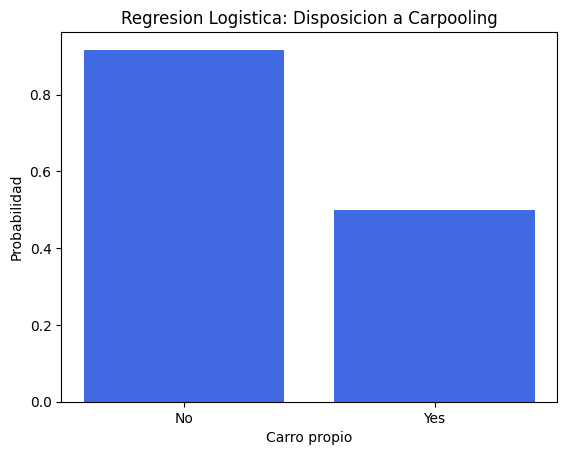

In [ ]:
# Plotting the regression model
coeff_const = result.params['const']
coeff_carro_propio = result.params['medio_trans_Carro propio']

carro_propio_values = [0, 1]

predicted_probs = 1 / (1 + np.exp(-(coeff_const + coeff_carro_propio * np.array(carro_propio_values))))

# Bar plot
plt.bar(carro_propio_values, predicted_probs, color='royalblue')
plt.xlabel("Carro propio")
plt.ylabel("Probabilidad")
plt.title("Regresion Logistica: Disposicion a Carpooling")
plt.xticks(carro_propio_values, ['No', 'Yes'])
plt.show()

In [ ]:
# Assuming your dataframe is called df
# Define the dependent variable (willingness to carpool) and independent variables (income categories)
X = df2[['ingreso_$1000 - $2000', 'ingreso_$2000 - $5000', 'ingreso_< $1000']]
y = df2['dispuesto_carpooling_Si']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.208922
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     dispuesto_carpooling_Si   No. Observations:                   20
Model:                               Logit   Df Residuals:                       17
Method:                                MLE   Df Model:                            2
Date:                     Mon, 30 Oct 2023   Pseudo R-squ.:                     inf
Time:                             20:35:17   Log-Likelihood:                -4.1784
converged:                            True   LL-Null:                        0.0000
Covariance Type:                 nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8331      6e+07   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


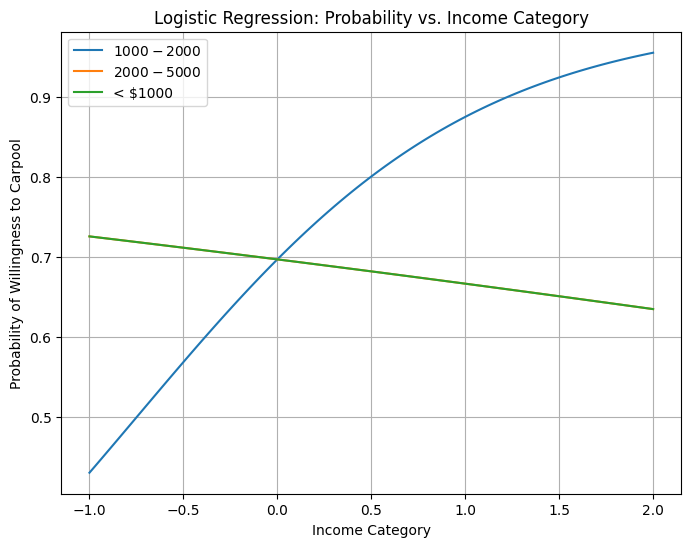

In [ ]:
# Extract the coefficients for the income categories
coef_income_1000_2000 = result.params['ingreso_$1000 - $2000']
coef_income_2000_5000 = result.params['ingreso_$2000 - $5000']
coef_income_less_1000 = result.params['ingreso_< $1000']

# Create a range of income values (you can adjust this as needed)
income_values = np.linspace(-1, 2, 100)

# Calculate the predicted probabilities for each income value
predicted_probs_1000_2000 = 1 / (1 + np.exp(-(result.params['const'] + coef_income_1000_2000 * income_values)))
predicted_probs_2000_5000 = 1 / (1 + np.exp(-(result.params['const'] + coef_income_2000_5000 * income_values)))
predicted_probs_less_1000 = 1 / (1 + np.exp(-(result.params['const'] + coef_income_less_1000 * income_values)))

# Plot the predicted probabilities
plt.figure(figsize=(8, 6))
plt.plot(income_values, predicted_probs_1000_2000, label='$1000 - $2000')
plt.plot(income_values, predicted_probs_2000_5000, label='$2000 - $5000')
plt.plot(income_values, predicted_probs_less_1000, label='< $1000')
plt.xlabel("Income Category")
plt.ylabel("Probability of Willingness to Carpool")
plt.title("Logistic Regression: Probability vs. Income Category")
plt.legend()
plt.grid()
plt.show()